# **Exploratory Data Analysis: Customer Churn**
- **Name:** Apriza Zicka Rizquina
- **Email:** aprizazickaa@gmail.com

## Abaout Datasets
The dataset contains customer churn data from a telecommunications (Telco) company. Customer churn refers to when a customer stops subscribing to a service. Churn can lead to significant losses or decreased revenue for a company. In this case, we will explore the data and build a predictive model to help reduce customer churn. This will enable proactive measures to be taken to address the issue.

## Import Library

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set_theme(style="darkgrid")

## Gathering Data

In [5]:
# Read train data
dt_train = pd.read_csv('Data Train (C2).csv')
dt_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [6]:
# Read test data
dt_test = pd.read_csv('Data Test (C2).csv')
dt_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Understanding the data

In [7]:
# Check data info
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [8]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

- Both datasets have 20 variables in total, but with one variable is different. In `dt_train`, there is an output variable called **churn**, while in `dt_test`, there is an **id** variable instead.
- `dt_train` has 8 float variables, 7 integer variables, and 5 object variables. While `dt_test` has 8 float variables, 8 integer variables, and 4 object variables.

### Data train (dt_train)

In [9]:
# check_data function
def check_data(dt):
    missing_values = dt.isnull().sum()
    duplicated_data = dt.duplicated().sum()

    print("Missing Values per Column:\n")
    print(missing_values)
    print("\nTotal Missing Values:", missing_values.sum())
    print("\nTotal Duplicate Data:", duplicated_data)

In [10]:
check_data(dt_train)

Missing Values per Column:

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Total Missing Values: 0

Total Duplicate Data: 0


In [11]:
print(dt_train.dtypes)

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object


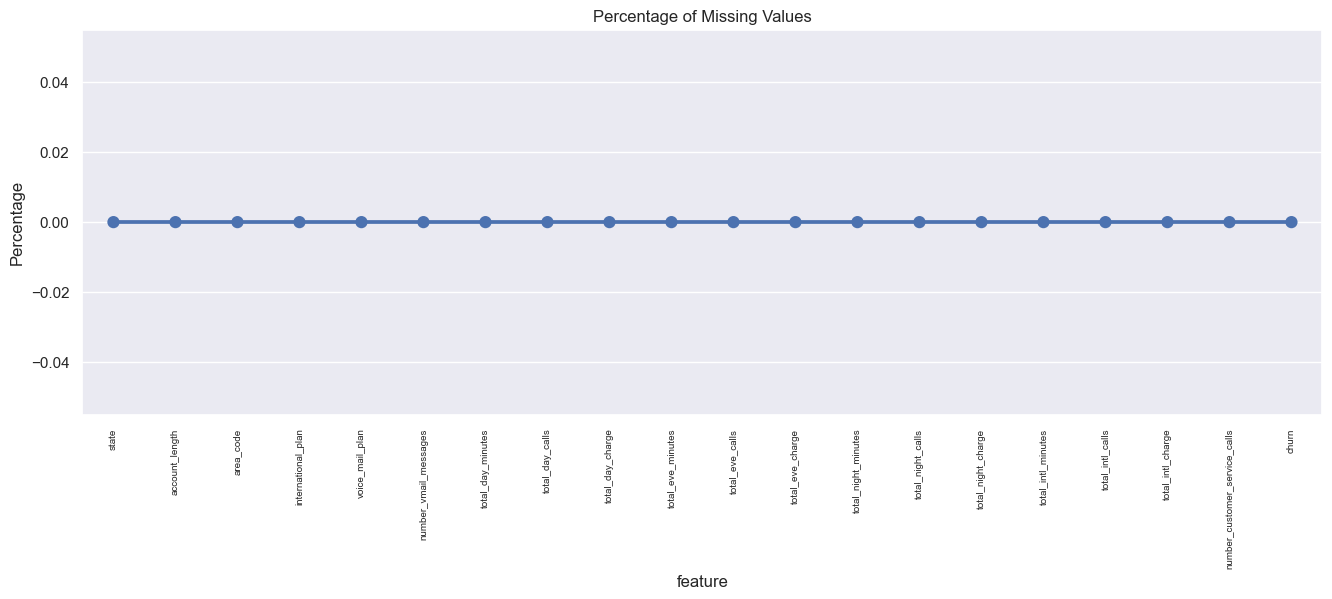

In [12]:
missing = pd.DataFrame((dt_train.isnull().sum())*100/dt_train.shape[0]).reset_index()
missing.columns = ['feature', 'missing_percentage']  # rename columns for clarity

plt.figure(figsize=(16,5))
ax = sns.pointplot(x='feature', y='missing_percentage', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()


- There's no missing and duplicated data in `dt_train`.
- Have to encode the object variables into numeric. **international_plan**, **voice_mail_plan**, **churn**.

### Data Test (dt_test)

In [13]:
check_data(dt_test)

Missing Values per Column:

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

Total Missing Values: 0

Total Duplicate Data: 0


## EDA

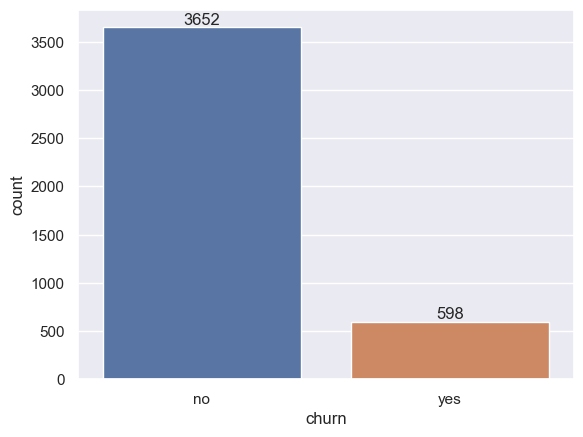

In [14]:
#count the churn
ax = sns.countplot(dt_train, x='churn')
for container in ax.containers:
    ax.bar_label(container)

In [15]:
# Count the number of 'yes' and 'no'
count = dt_train['churn'].value_counts()

# Total number of samples
total = count.sum()

# Calculate percentages
no_percentage = (count['no'] / total) * 100
yes_percentage = (count['yes'] / total) * 100

# Print the results
print(f"Yes: {yes_percentage:.2f}%, No: {no_percentage:.2f}%")


Yes: 14.07%, No: 85.93%


The dataset is imbalanced, with more than 70% of the data belonging to a single class, which is the 'no' class.

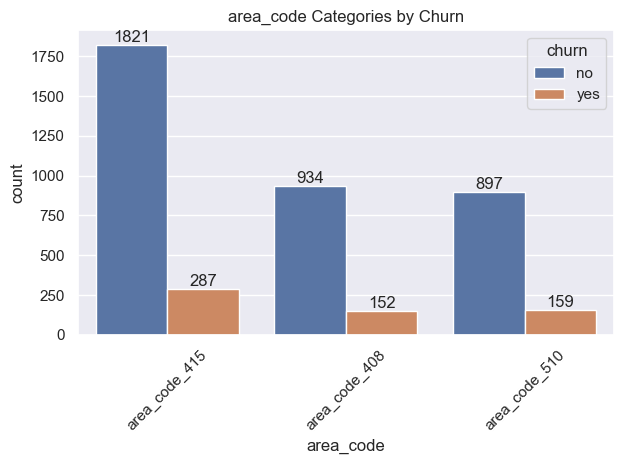

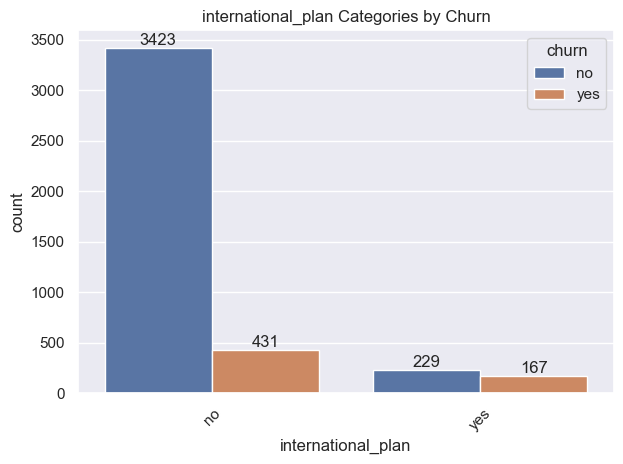

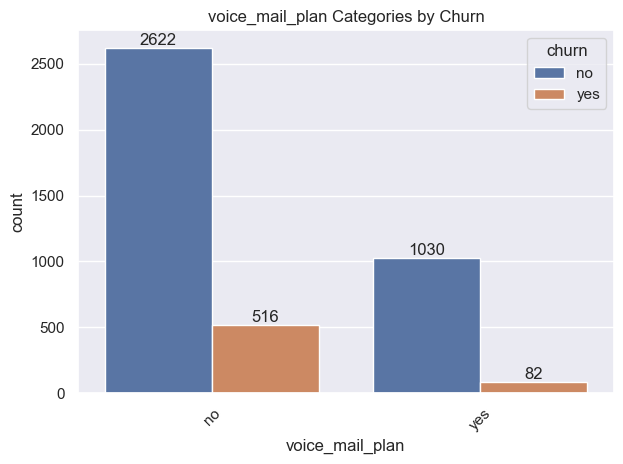

In [16]:
# List of specific predictors
predictors = ['area_code', 'international_plan', 'voice_mail_plan']

for i, predictor in enumerate(predictors):
    plt.figure(i)

    # Order categories by total count
    order = dt_train[predictor].value_counts().index

    # Plot with ordered categories
    ax = sns.countplot(data=dt_train, x=predictor, hue='churn', order=order)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{predictor} Categories by Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()


- The most churn occurred in **area_code_41** with 287 churn cases, while the fewest churn cases were in **area_code_408** with 152.
- Customers who do not use the international plan and Voice mail plan have more churn than those who do.

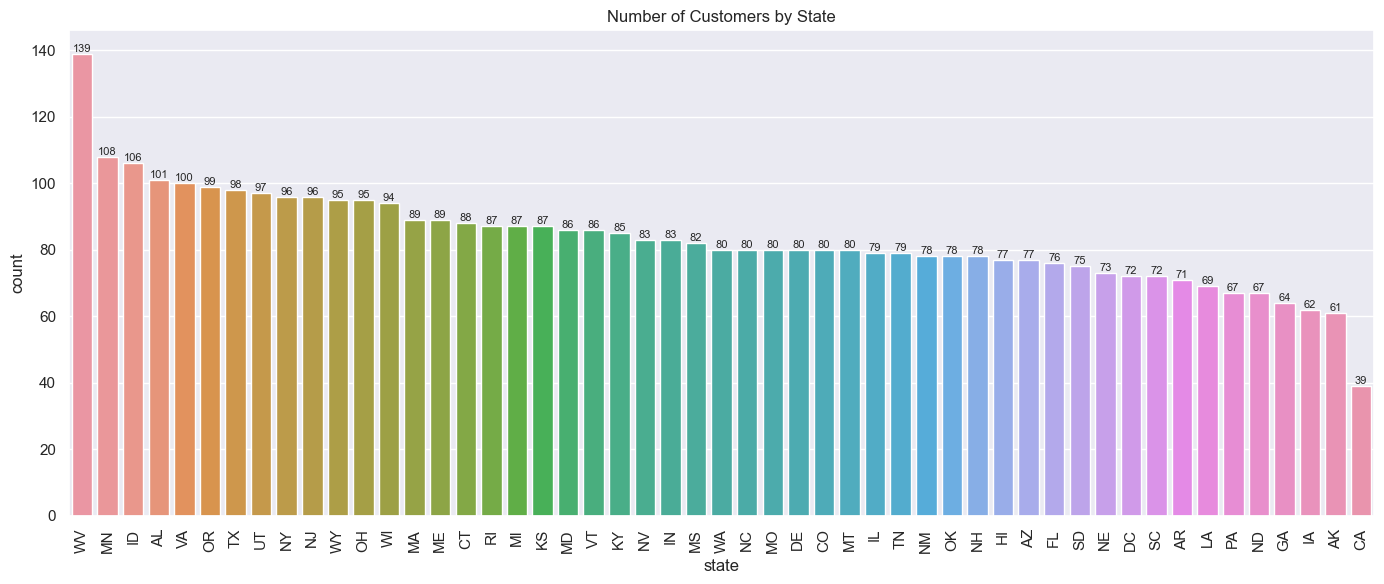

In [17]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=dt_train, x='state', order=dt_train['state'].value_counts().index)
plt.title('Number of Customers by State')
plt.xticks(rotation=90)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.tight_layout()
plt.show()

Most customers came from WV state, and the fewest came from CA state.

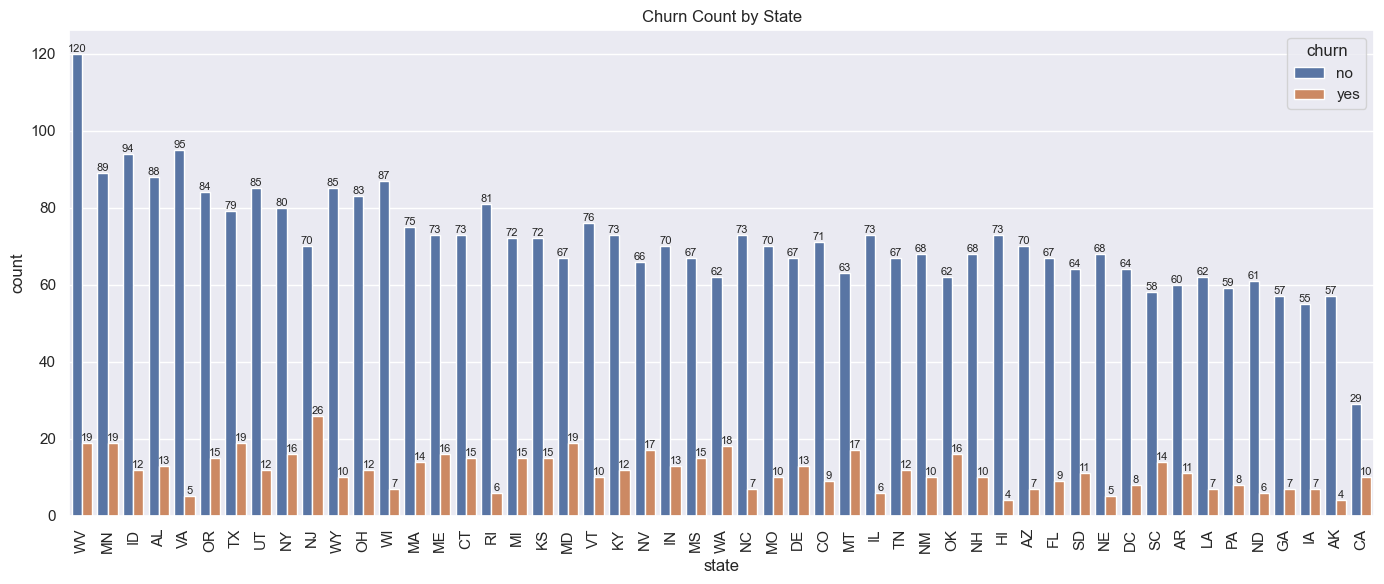

In [18]:
plt.figure(figsize=(14, 6))
ax = sns.countplot(data=dt_train, x='state', hue='churn', order=dt_train['state'].value_counts().index)
plt.title('Churn Count by State')
plt.xticks(rotation=90)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fontsize=8)

plt.tight_layout()
plt.show()

The state with the most churn cases is NJ, with 26 cases. 

In [19]:
# Descriptive analysis
dt_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


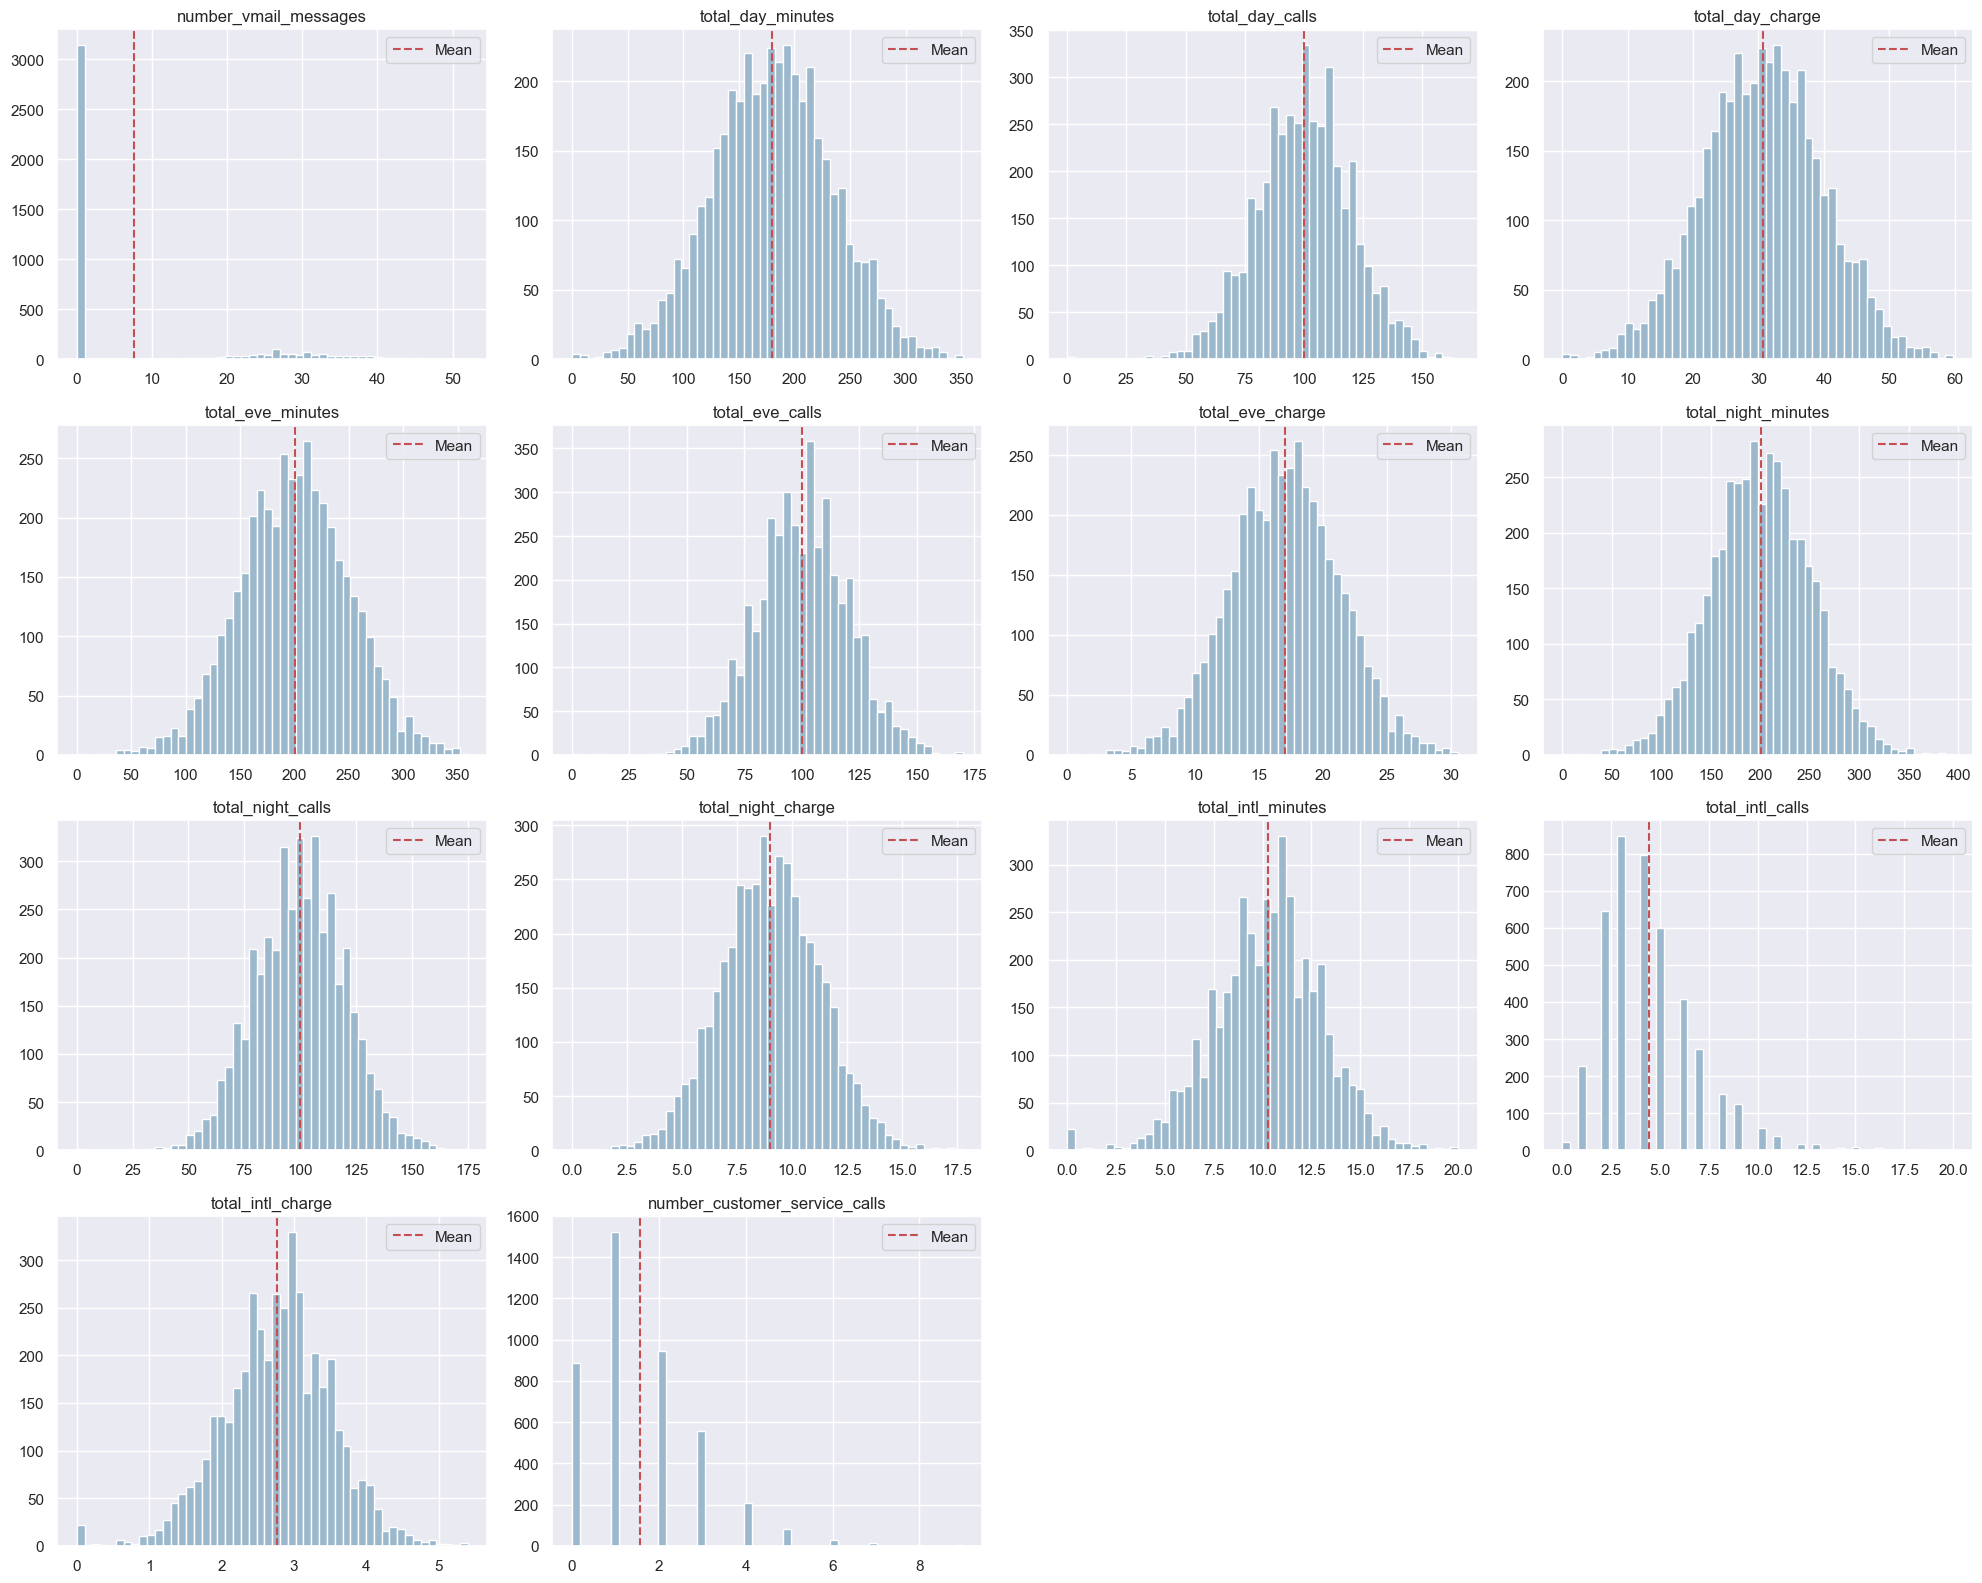

In [20]:
# Set style
sns.set_style('dark')

# Select numerical features
temp = dt_train[[
    'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
    'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 
    'total_eve_charge', 'total_night_minutes', 'total_night_calls', 
    'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 
    'total_intl_charge', 'number_customer_service_calls'
]]

# Create subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 16))  # 4x4 because you have 14 variables

axes = axes.flatten()  # Flatten to make indexing easier

# Plot histograms
for idx, col in enumerate(temp.columns):
    temp[col].hist(bins=50, ax=axes[idx], color='#9BB8CD')
    axes[idx].axvline(temp[col].mean(), color='r', linestyle='--', label='Mean')
    axes[idx].set_title(col)
    axes[idx].legend()

# Remove empty subplots
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


From the histograms, all features appear to have a normal distribution except for **number_vmail_messages**, **total_intl_calls**, and **number_customer_service_calls**. This is because these features are discrete, highly skewed, or have a limited range of possible values, causing their distributions to deviate from normality.

## Feature Encoding
Label Encoding is used here due to the large number of classes that need to be encoded efficiently.

In [21]:
# encoding function
def label_enc(data, col):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(data[col])
  data[col] = le.transform(data[col])
  return data[col]

In [22]:
dt_train['state'] = label_enc(dt_train, 'state')
dt_train['area_code'] = label_enc(dt_train, 'area_code')
dt_train['international_plan'] = label_enc(dt_train, 'international_plan')
dt_train['voice_mail_plan'] = label_enc(dt_train, 'voice_mail_plan')
dt_train['churn'] = label_enc(dt_train, 'churn')

In [23]:
dt_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


## Correlation Matrix

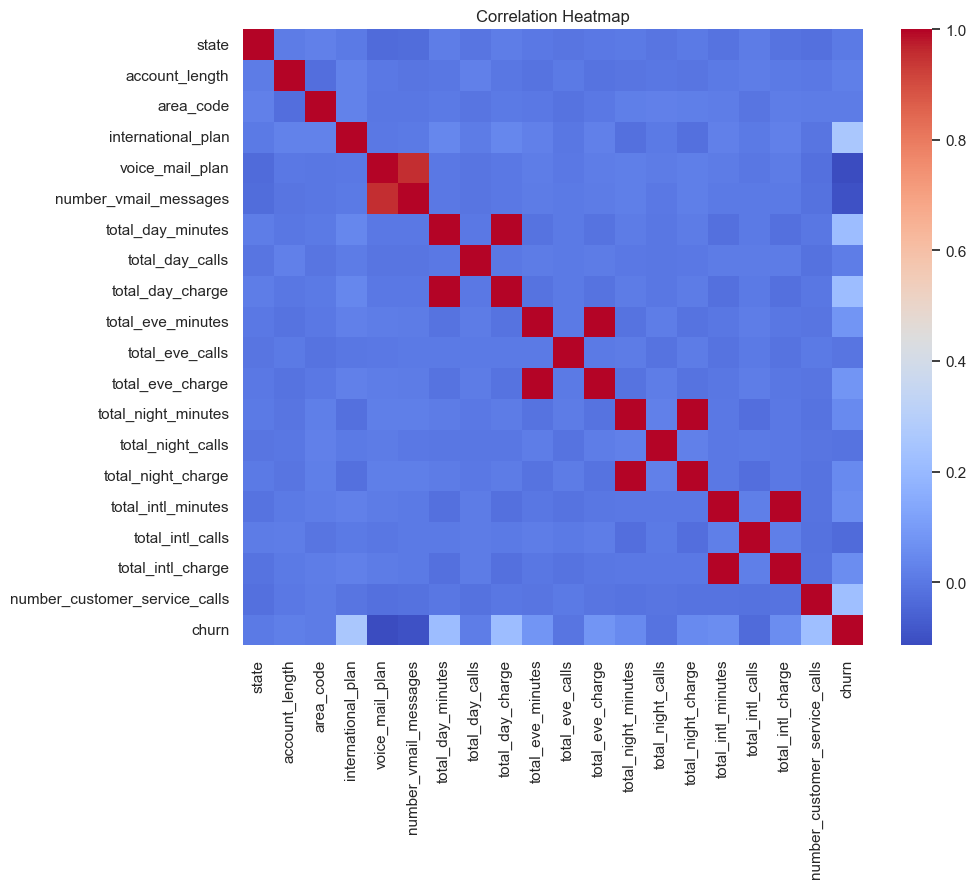

In [24]:
# Select only numeric columns
numeric_data = dt_train.select_dtypes(include=['number'])

# Calculate correlation on numeric columns only
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap')
plt.show()


In [25]:
corr_matrix["churn"].sort_values()

voice_mail_plan                 -0.114643
number_vmail_messages           -0.100347
total_intl_calls                -0.034334
total_night_calls               -0.012699
total_eve_calls                 -0.006817
state                            0.007181
area_code                        0.010696
total_day_calls                  0.011640
account_length                   0.019378
total_night_charge               0.046641
total_night_minutes              0.046647
total_intl_charge                0.055177
total_intl_minutes               0.055186
total_eve_charge                 0.078852
total_eve_minutes                0.078855
total_day_charge                 0.215263
total_day_minutes                0.215272
number_customer_service_calls    0.221220
international_plan               0.259053
churn                            1.000000
Name: churn, dtype: float64

There is a weak positive correlation between **international_plan**, **total_day_minutes**, **total_day_charge**, and 
**number_customer_service_calls** with churn. This means that as the likelihood of churn increases, these features also tend to increase slightly.